In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

# from utility import *

In [2]:
def load_cup():
    ml_cup = np.delete(np.genfromtxt('../../cup/ML-CUP20-TR.csv', 
                                     delimiter=','), obj=0, axis=1)
    return ml_cup[:, :-2], ml_cup[:, -2:]

def load_cup_blind():
    return np.delete(np.genfromtxt('../../cup/ML-CUP20-TS.csv',
                                   delimiter=','), obj=0, axis=1)
    
def mean_euclidean_error(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return np.mean(np.linalg.norm(y_pred - y_true, axis=1))

In [3]:
neg_mean_euclidean_error = make_scorer(mean_euclidean_error, greater_is_better=False)

In [4]:
X, y = load_cup()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt

In [6]:
finite = []
for i in range(0,3):
    svr = MultiOutputRegressor(SVR(epsilon=0.9, C=14, gamma=0.08, kernel='rbf'))
    svr.fit(X_train, y_train)
    out = svr.predict(X_test)
    m = mean_euclidean_error(out, y_test)
    finite.append(m)

In [7]:
np.mean(finite)

3.2100328553647706

In [8]:
from sklearn.model_selection import learning_curve
# Ploting Learning Curve
# Creating CV training and test scores forvarious training set sizes
train_sizes, train_scores, test_scores = learning_curve(svr,
                                           X, y, scoring=neg_mean_euclidean_error, n_jobs=-1)

In [9]:
train_sizes

array([ 121,  396,  670,  944, 1219])

In [10]:
train_scores = train_scores * (-1)
test_scores = test_scores * (-1)

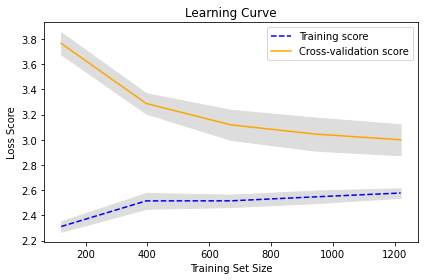

In [11]:
# Creating means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Creating means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Drawing lines
# plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="orange", label="Cross-validation score")

# Drawing bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Creating plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Loss Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()
